In [1]:
from shakermaker.crustmodel import CrustModel
from shakermaker.ffspsource import FFSPSource # Finite Fault Stochastic Process (FFSP) source model

# Model crustal
crustal = CrustModel(3)
crustal.add_layer(15.5, 5.5, 3.14, 2.5, 1000.0, 1000.0)
crustal.add_layer(31.5, 7.0, 4.0, 2.67, 1000.0, 1000.0)
crustal.add_layer(0.0, 8.0, 4.57, 2.8, 1000.0, 1000.0)  

# Create FFSP source with all parameters from your .inp
source = FFSPSource(
    id_sf_type=8,  freq_min=0.01,  freq_max=24.0,
    fault_length=30.0,   fault_width=16.0,
    x_hypc=15.0,  y_hypc=8.0,  depth_hypc=8.0,
    xref_hypc=0.0,  yref_hypc=0.0,
    magnitude=6.7,  fc_main_1=0.09,  fc_main_2=3.0,
    rv_avg=3.0,
    ratio_rise=0.3,
    strike=358.0,  dip=40.0,  rake=113.0,
    pdip_max=15.0,   prake_max=30.0,
    nsubx=256,   nsuby=128,
    nb_taper_trbl=[5, 5, 5, 5],
    seeds=[52, 448, 4446],
    id_ran1=1,  id_ran2=10,
    angle_north_to_x=0.0,
    is_moment=3,
    crust_model=crustal,
    cleanup=True,  
    verbose=True
)

# Run FFSP
subfaults = source.run()


Working directory: /tmp/ffsp_fwwfhoyp
Running FFSP...
 The corner freqs are:   2.85430811E-02  0.794329286    
 ratio=    1.31781018    
 Finishing the setup of global variable
 Magnitude =    6.69999886    
 expected double corner frequency =    2.85430811E-02  0.794329286    
 expected Td_95=    8.70290184    
 expected average rise time =   1.05749595    
 ntime =       131072  lnpt =           17
 nphf =        65536
 nbb =            1  nee =           12
 io_dva =            3
 cross rise, slip-amp  0.756234348      0.750000000      0.750000000    
 correlation between slip and rise time =   0.756234348    
 correlation between stress drop and rise time =   0.756236613    
 creating k^-1 peak time distribution with mean of   0.211499199      0.995000005    
 correct =   0.211348280    
 correlation between pktm and slip=   0.103496887    
 correlation between pktm and rise time=    7.13110864E-02
 maximum rupture time =   8.76516342    
 maximum and minimum    2.38312554       8.

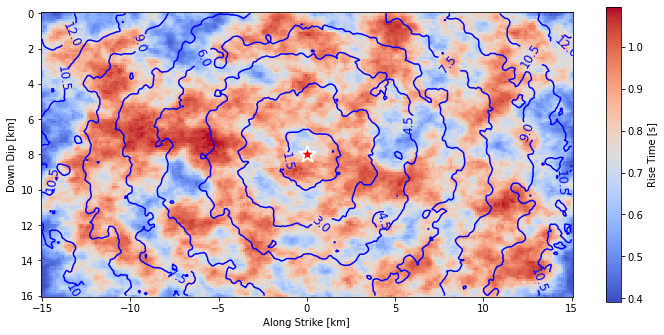

In [2]:
source.set_active_realization(7)  
source.plot_slip_distribution(figsize=(10, 8), cmap='coolwarm')

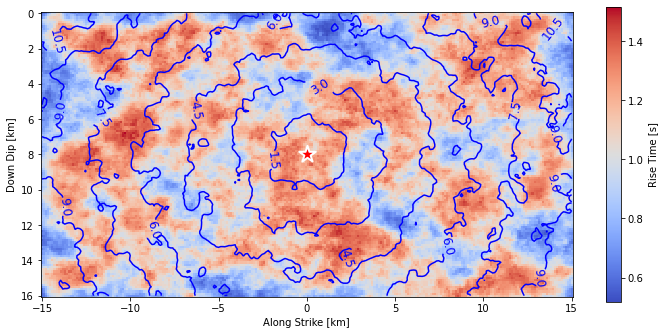

In [3]:
source.subfaults = source.best_realization
source.plot_slip_distribution(figsize=(10, 8), cmap='coolwarm')

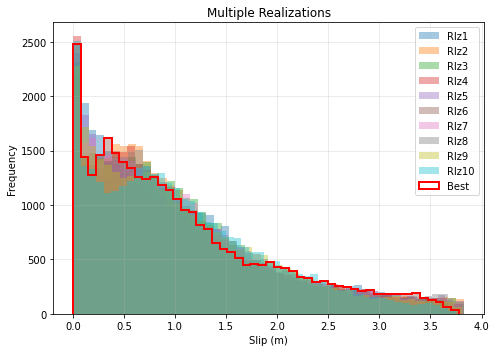

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
for i in range(source.all_realizations['n_realizations']):
    var = source.all_realizations['slip'][:, i]
    plt.hist(var, bins=50, alpha=0.4, label=f'Rlz{i+1}')
var_best = source.best_realization['slip']
plt.hist(var_best, bins=50, histtype='step', color='red', linewidth=2, label='Best')

plt.xlabel('Slip (m)')
plt.ylabel('Frequency')
plt.title('Multiple Realizations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()